In [1]:
%reset

In [1]:
import numpy as np
import pandas as pd
import os
import json_module, dirs_module
import txt_module
import importlib
import matplotlib.pyplot as plt


plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# constants
ZERO_PADDING_MULTIPLE = 1
NUM_COEF_TO_SAVE = 31999

project_dir = 'D:/FINKI/40_diploma_thesis'

# calculating fft on data that can be used for training
data_dir = fr'E:\40_diploma_thesis\datasets_numpy_1S_OffsetHealthy001_OffsetDamaged005'

arrays_index = txt_module.read_list_from_txt(f'{project_dir}/data/datasets_numpy/index.txt')
arrays_index = [feature for feature in arrays_index if not feature.startswith('Temp')]
min_measurement_lengths = json_module.read_json(f'{project_dir}/metadata/min_measurement_lengths.json')

y_map = json_module.read_json(f'{project_dir}/metadata/y_map.json')

plots_dir = 'histogramed_fft_distribution'
import dirs_module
dirs_module.create_directory(plots_dir)

In [3]:
features_to_generate = [
    # 'Mech_4kHz_Data',
    # 'HostService_64kHz_Data',
    # 'Temp_1Hz_Data',
    # 'Mech_4kHz_force',
    # 'HostService_64kHz_phase_current_1',
    # 'HostService_64kHz_phase_current_2',
    # 'Mech_4kHz_speed',
    # 'Temp_1Hz_temp_2_bearing_module',
    # 'Mech_4kHz_torque',
    'HostService_64kHz_vibration_1'
]

all_bearing_codes = list()
for file in os.listdir(r'D:\FINKI\40_diploma_thesis\data\datasets_csv'):
    bearing_code = file.split('_')[3]
    if bearing_code not in all_bearing_codes:
        all_bearing_codes.append(bearing_code)

HostService_64kHz_vibration_1
K001
K002
K003
K004
K005
K006
KA01
KA03
KA04
KA05
KA06
KA07
KA08
KA09
KA15
KA16
KA22
KA30
KB23
KB24
KB27
KI01
KI03
KI04
KI05
KI07
KI08
KI14
KI16
KI17
KI18
KI21


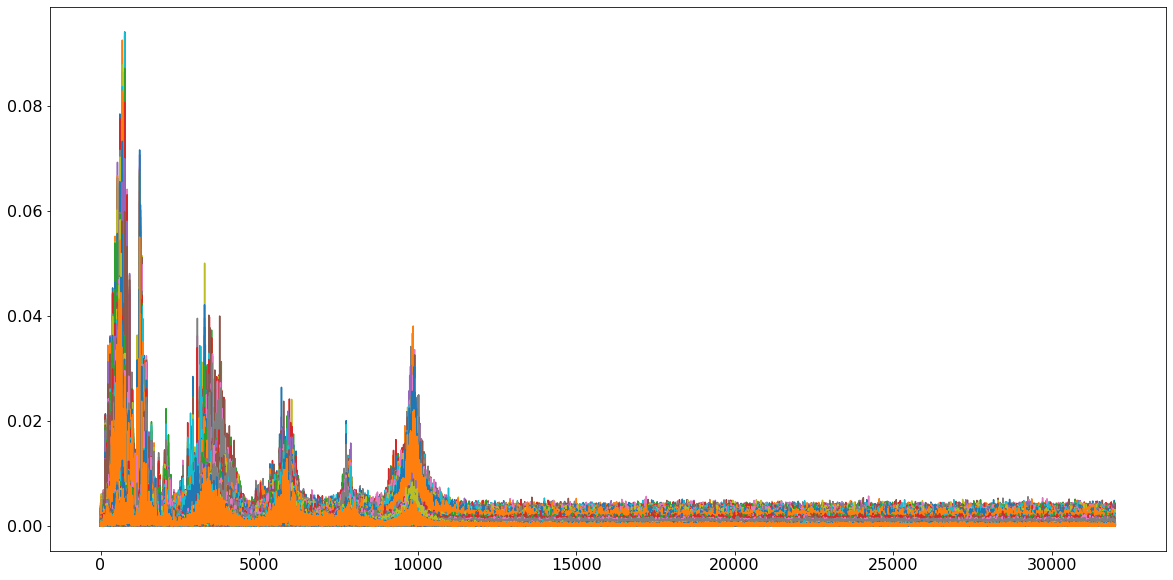

In [4]:
for feature in features_to_generate:
    print(feature)
    feature_arrays_fft_per_bearing_code = dict()

    for bearing_code in all_bearing_codes:
        print(bearing_code)
        feature_arrays = list()
        feature_arrays_fft = list()

        for file in os.listdir(data_dir)[::100]:
            if bearing_code not in file: continue
            file_ndarray = np.load(f'{data_dir}/{file}', allow_pickle = True)
            feature_index = arrays_index.index(feature)
            feature_array = file_ndarray[0].astype('float32')
            # fourier transform
            feature_array_fft = (np.abs(np.fft.fft(
                    feature_array, n = feature_array.shape[0] * ZERO_PADDING_MULTIPLE)
            ) / feature_array.shape[0])[1:32000]
            feature_arrays_fft.append(feature_array_fft)

        feature_arrays_fft_per_bearing_code[bearing_code] = feature_arrays_fft
        for i in feature_arrays_fft_per_bearing_code[bearing_code]:
            plt.plot(np.arange(i.shape[0]),i)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'all_fft_bigger_ticks.png', dpi = 330, bbox_inches='tight')
# plt.show()

In [ ]:
1